In [1]:
import torch
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import random
# from d2l import torch as d2l

In [2]:
dataset_name = 'subjective_belief_observers_features_labels.csv'
data = pd.read_csv(dataset_name)

In [3]:
# check data integrity
observers_predict_label = np.array([0 for _ in range(data.shape[0])])
observers_predict_label.reshape(-1, 1)
true_labels = data.iloc[:, -1]
for i in range(data.shape[0]):
    if data.iloc[i][0][-1] == 'n':
        observers_predict_label[i] = 1
observers_predict_label = pd.DataFrame(observers_predict_label)
correct_trust, correct_doubt, total_trust, total_doubt = 0, 0, 0, 0
for i in range(data.shape[0]):
    if true_labels[i] == 1:
        total_trust += 1
        if observers_predict_label.iloc[i][0] == 1:
            correct_trust += 1
    else:
        total_doubt += 1
        if observers_predict_label.iloc[i][0] == 0:
            correct_doubt += 1

In [4]:
# drop first column of participant id
data.drop(data.columns[0], axis=1, inplace=True)
data = pd.concat([data.iloc[:, -40:-1], observers_predict_label], axis=1)
# normalise input data
for column in data.columns[:-1]:
    # the last column is target
    data[column] = data.loc[:, [column]].apply(lambda x: (x - x.mean()) / x.std())
# according to original dataset 23 participants are involved
num_participants = 23
# 
print(data.shape)

(368, 40)


In [5]:
features = data.iloc[:, :39]
least_signifant_features = [11, 24, 35]
features.drop(features.columns[least_signifant_features], axis=1, inplace=True)
labels = data.iloc[:, 39:]
print(features.shape)

(368, 36)


In [6]:
num_feats = data.shape[1] - 1
num_inputs = num_feats
num_classes = 2

In [7]:
# mini batch iteration
def data_iter(batch_size, features, labels):
    num_examples = len(labels)
    indices = list(range(num_examples))
    # randomly selecting 
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [8]:
# hyperparams
num_hidden_neurons = 100
epochs = 300
learning_rate = .01

In [9]:
class Reshape(nn.Module):
    def forward(self, x):
        return x.view(-1, 1, 1, 36)

Epoch: 0/300; Loss: 0.7683; Accuracy: 47.54 %
Epoch: 50/300; Loss: 0.5331; Accuracy: 70.14 %
Epoch: 100/300; Loss: 0.1974; Accuracy: 91.01 %
Epoch: 150/300; Loss: 0.0322; Accuracy: 100.00 %
Epoch: 200/300; Loss: 0.0050; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0020; Accuracy: 100.00 %


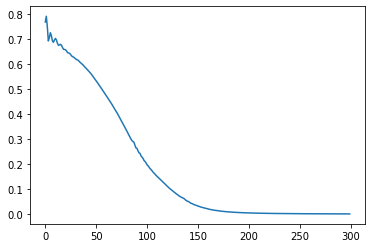

tensor(7.1290, grad_fn=<NllLossBackward>)
Test accuracy total: 56.52 %; correct: 13; wrong: 10;
Test accuracy doubt: 27.27 %; correct: 3; wrong: 8;
Test accuracy no-doubt: 83.33 %; correct: 10; wrong: 2;

Epoch: 0/300; Loss: 0.9635; Accuracy: 48.00 %
Epoch: 50/300; Loss: 0.6182; Accuracy: 62.00 %
Epoch: 100/300; Loss: 0.4300; Accuracy: 81.14 %
Epoch: 150/300; Loss: 0.2312; Accuracy: 92.00 %
Epoch: 200/300; Loss: 0.0633; Accuracy: 98.86 %
Epoch: 250/300; Loss: 0.0166; Accuracy: 100.00 %


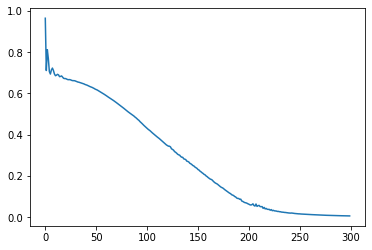

tensor(2.8600, grad_fn=<NllLossBackward>)
Test accuracy total: 72.22 %; correct: 13; wrong: 5;
Test accuracy doubt: 57.14 %; correct: 4; wrong: 3;
Test accuracy no-doubt: 81.82 %; correct: 9; wrong: 2;

Epoch: 0/300; Loss: 0.8263; Accuracy: 47.28 %
Epoch: 50/300; Loss: 0.5664; Accuracy: 71.35 %
Epoch: 100/300; Loss: 0.2893; Accuracy: 88.25 %
Epoch: 150/300; Loss: 0.0985; Accuracy: 97.42 %
Epoch: 200/300; Loss: 0.0215; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0063; Accuracy: 100.00 %


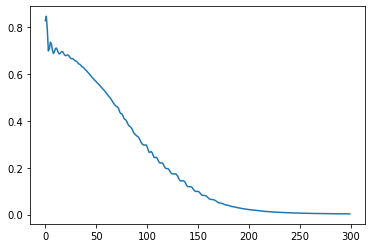

tensor(3.6994, grad_fn=<NllLossBackward>)
Test accuracy total: 63.16 %; correct: 12; wrong: 7;
Test accuracy doubt: 50.00 %; correct: 5; wrong: 5;
Test accuracy no-doubt: 77.78 %; correct: 7; wrong: 2;

Epoch: 0/300; Loss: 0.9969; Accuracy: 47.01 %
Epoch: 50/300; Loss: 0.5845; Accuracy: 66.38 %
Epoch: 100/300; Loss: 0.2608; Accuracy: 90.03 %
Epoch: 150/300; Loss: 0.0678; Accuracy: 98.86 %
Epoch: 200/300; Loss: 0.0154; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0057; Accuracy: 100.00 %


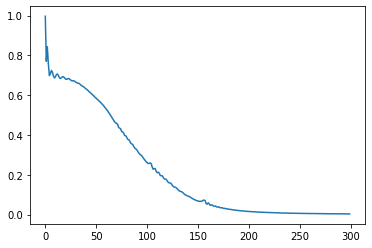

tensor(5.2700, grad_fn=<NllLossBackward>)
Test accuracy total: 58.82 %; correct: 10; wrong: 7;
Test accuracy doubt: 60.00 %; correct: 6; wrong: 4;
Test accuracy no-doubt: 57.14 %; correct: 4; wrong: 3;

Epoch: 0/300; Loss: 0.7379; Accuracy: 52.54 %
Epoch: 50/300; Loss: 0.5643; Accuracy: 66.95 %
Epoch: 100/300; Loss: 0.2356; Accuracy: 91.81 %
Epoch: 150/300; Loss: 0.0351; Accuracy: 99.72 %
Epoch: 200/300; Loss: 0.0080; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0034; Accuracy: 100.00 %


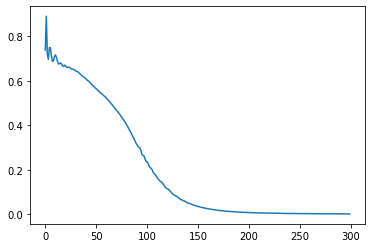

tensor(3.9495, grad_fn=<NllLossBackward>)
Test accuracy total: 64.29 %; correct: 9; wrong: 5;
Test accuracy doubt: 85.71 %; correct: 6; wrong: 1;
Test accuracy no-doubt: 42.86 %; correct: 3; wrong: 4;

Epoch: 0/300; Loss: 0.7327; Accuracy: 51.86 %
Epoch: 50/300; Loss: 0.6053; Accuracy: 66.76 %
Epoch: 100/300; Loss: 0.4153; Accuracy: 80.80 %
Epoch: 150/300; Loss: 0.2284; Accuracy: 90.83 %
Epoch: 200/300; Loss: 0.0936; Accuracy: 97.42 %
Epoch: 250/300; Loss: 0.0276; Accuracy: 99.71 %


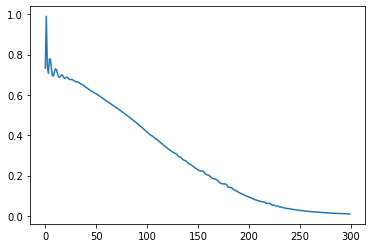

tensor(1.6615, grad_fn=<NllLossBackward>)
Test accuracy total: 73.68 %; correct: 14; wrong: 5;
Test accuracy doubt: 85.71 %; correct: 6; wrong: 1;
Test accuracy no-doubt: 66.67 %; correct: 8; wrong: 4;

Epoch: 0/300; Loss: 0.8326; Accuracy: 47.88 %
Epoch: 50/300; Loss: 0.5330; Accuracy: 73.94 %
Epoch: 100/300; Loss: 0.1994; Accuracy: 92.92 %
Epoch: 150/300; Loss: 0.0309; Accuracy: 100.00 %
Epoch: 200/300; Loss: 0.0068; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0029; Accuracy: 100.00 %


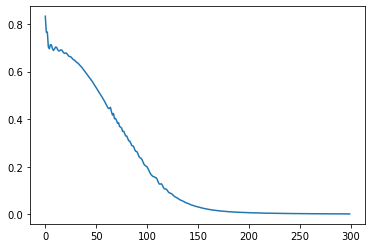

tensor(7.4857, grad_fn=<NllLossBackward>)
Test accuracy total: 53.33 %; correct: 8; wrong: 7;
Test accuracy doubt: 66.67 %; correct: 4; wrong: 2;
Test accuracy no-doubt: 44.44 %; correct: 4; wrong: 5;

Epoch: 0/300; Loss: 1.3327; Accuracy: 46.20 %
Epoch: 50/300; Loss: 0.6386; Accuracy: 61.40 %
Epoch: 100/300; Loss: 0.4730; Accuracy: 76.32 %
Epoch: 150/300; Loss: 0.2337; Accuracy: 91.23 %
Epoch: 200/300; Loss: 0.0724; Accuracy: 98.83 %
Epoch: 250/300; Loss: 0.0166; Accuracy: 100.00 %


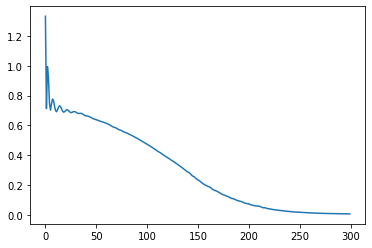

tensor(5.5017, grad_fn=<NllLossBackward>)
Test accuracy total: 50.00 %; correct: 13; wrong: 13;
Test accuracy doubt: 52.94 %; correct: 9; wrong: 8;
Test accuracy no-doubt: 44.44 %; correct: 4; wrong: 5;

Epoch: 0/300; Loss: 1.0182; Accuracy: 48.42 %
Epoch: 50/300; Loss: 0.5817; Accuracy: 67.62 %
Epoch: 100/300; Loss: 0.2900; Accuracy: 89.11 %
Epoch: 150/300; Loss: 0.1140; Accuracy: 96.56 %
Epoch: 200/300; Loss: 0.0366; Accuracy: 99.43 %
Epoch: 250/300; Loss: 0.0128; Accuracy: 100.00 %


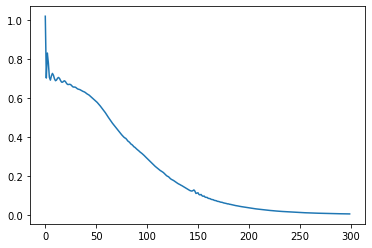

tensor(5.6828, grad_fn=<NllLossBackward>)
Test accuracy total: 57.89 %; correct: 11; wrong: 8;
Test accuracy doubt: 66.67 %; correct: 4; wrong: 2;
Test accuracy no-doubt: 53.85 %; correct: 7; wrong: 6;

Epoch: 0/300; Loss: 0.7051; Accuracy: 47.52 %
Epoch: 50/300; Loss: 0.5628; Accuracy: 71.43 %
Epoch: 100/300; Loss: 0.2166; Accuracy: 93.29 %
Epoch: 150/300; Loss: 0.0240; Accuracy: 100.00 %
Epoch: 200/300; Loss: 0.0048; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0021; Accuracy: 100.00 %


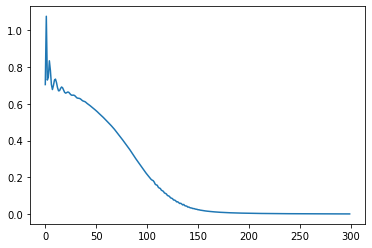

tensor(5.7553, grad_fn=<NllLossBackward>)
Test accuracy total: 56.00 %; correct: 14; wrong: 11;
Test accuracy doubt: 57.14 %; correct: 8; wrong: 6;
Test accuracy no-doubt: 54.55 %; correct: 6; wrong: 5;

Epoch: 0/300; Loss: 0.7076; Accuracy: 52.97 %
Epoch: 50/300; Loss: 0.6081; Accuracy: 63.17 %
Epoch: 100/300; Loss: 0.4261; Accuracy: 78.19 %
Epoch: 150/300; Loss: 0.2318; Accuracy: 90.93 %
Epoch: 200/300; Loss: 0.0760; Accuracy: 99.43 %
Epoch: 250/300; Loss: 0.0208; Accuracy: 100.00 %


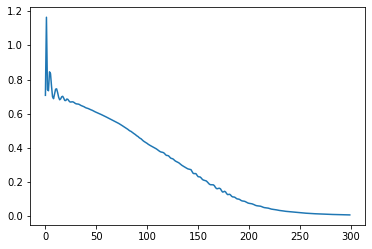

tensor(2.9096, grad_fn=<NllLossBackward>)
Test accuracy total: 66.67 %; correct: 10; wrong: 5;
Test accuracy doubt: 55.56 %; correct: 5; wrong: 4;
Test accuracy no-doubt: 83.33 %; correct: 5; wrong: 1;

Epoch: 0/300; Loss: 0.7683; Accuracy: 46.61 %
Epoch: 50/300; Loss: 0.5384; Accuracy: 69.77 %
Epoch: 100/300; Loss: 0.2761; Accuracy: 88.42 %
Epoch: 150/300; Loss: 0.0907; Accuracy: 97.18 %
Epoch: 200/300; Loss: 0.0172; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0058; Accuracy: 100.00 %


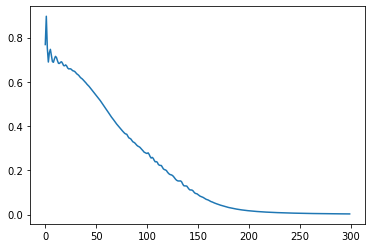

tensor(2.5843, grad_fn=<NllLossBackward>)
Test accuracy total: 57.14 %; correct: 8; wrong: 6;
Test accuracy doubt: 60.00 %; correct: 6; wrong: 4;
Test accuracy no-doubt: 50.00 %; correct: 2; wrong: 2;

Epoch: 0/300; Loss: 0.6920; Accuracy: 51.84 %
Epoch: 50/300; Loss: 0.6123; Accuracy: 63.17 %
Epoch: 100/300; Loss: 0.3270; Accuracy: 83.29 %
Epoch: 150/300; Loss: 0.1492; Accuracy: 95.75 %
Epoch: 200/300; Loss: 0.0646; Accuracy: 99.15 %
Epoch: 250/300; Loss: 0.0206; Accuracy: 100.00 %


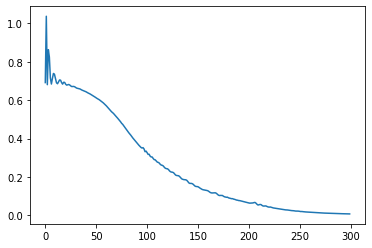

tensor(4.0751, grad_fn=<NllLossBackward>)
Test accuracy total: 60.00 %; correct: 9; wrong: 6;
Test accuracy doubt: 40.00 %; correct: 2; wrong: 3;
Test accuracy no-doubt: 70.00 %; correct: 7; wrong: 3;

Epoch: 0/300; Loss: 0.7059; Accuracy: 52.25 %
Epoch: 50/300; Loss: 0.5583; Accuracy: 68.82 %
Epoch: 100/300; Loss: 0.2737; Accuracy: 87.92 %
Epoch: 150/300; Loss: 0.0767; Accuracy: 98.88 %
Epoch: 200/300; Loss: 0.0135; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0043; Accuracy: 100.00 %


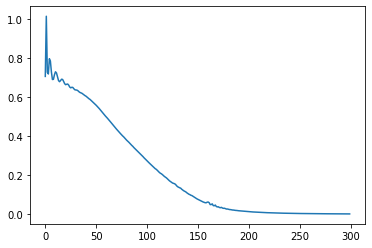

tensor(5.8856, grad_fn=<NllLossBackward>)
Test accuracy total: 50.00 %; correct: 6; wrong: 6;
Test accuracy doubt: 40.00 %; correct: 2; wrong: 3;
Test accuracy no-doubt: 57.14 %; correct: 4; wrong: 3;

Epoch: 0/300; Loss: 0.7330; Accuracy: 47.38 %
Epoch: 50/300; Loss: 0.6584; Accuracy: 61.05 %
Epoch: 100/300; Loss: 0.5599; Accuracy: 70.06 %
Epoch: 150/300; Loss: 0.3181; Accuracy: 84.88 %
Epoch: 200/300; Loss: 0.1229; Accuracy: 96.22 %
Epoch: 250/300; Loss: 0.0262; Accuracy: 100.00 %


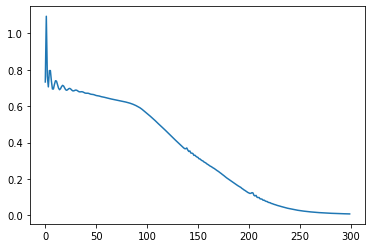

tensor(3.7788, grad_fn=<NllLossBackward>)
Test accuracy total: 62.50 %; correct: 15; wrong: 9;
Test accuracy doubt: 75.00 %; correct: 9; wrong: 3;
Test accuracy no-doubt: 50.00 %; correct: 6; wrong: 6;

Epoch: 0/300; Loss: 0.7059; Accuracy: 48.15 %
Epoch: 50/300; Loss: 0.5435; Accuracy: 69.52 %
Epoch: 100/300; Loss: 0.3347; Accuracy: 82.91 %
Epoch: 150/300; Loss: 0.1780; Accuracy: 93.45 %
Epoch: 200/300; Loss: 0.0698; Accuracy: 98.58 %
Epoch: 250/300; Loss: 0.0283; Accuracy: 100.00 %


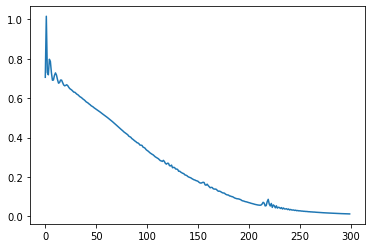

tensor(3.1343, grad_fn=<NllLossBackward>)
Test accuracy total: 64.71 %; correct: 11; wrong: 6;
Test accuracy doubt: 66.67 %; correct: 4; wrong: 2;
Test accuracy no-doubt: 63.64 %; correct: 7; wrong: 4;

Epoch: 0/300; Loss: 0.8724; Accuracy: 46.99 %
Epoch: 50/300; Loss: 0.5961; Accuracy: 68.48 %
Epoch: 100/300; Loss: 0.2189; Accuracy: 92.26 %
Epoch: 150/300; Loss: 0.0261; Accuracy: 100.00 %
Epoch: 200/300; Loss: 0.0052; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0023; Accuracy: 100.00 %


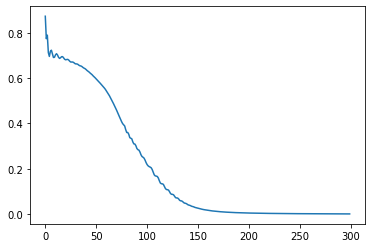

tensor(5.1272, grad_fn=<NllLossBackward>)
Test accuracy total: 63.16 %; correct: 12; wrong: 7;
Test accuracy doubt: 72.73 %; correct: 8; wrong: 3;
Test accuracy no-doubt: 50.00 %; correct: 4; wrong: 4;

Epoch: 0/300; Loss: 0.7952; Accuracy: 52.57 %
Epoch: 50/300; Loss: 0.4646; Accuracy: 76.57 %
Epoch: 100/300; Loss: 0.1979; Accuracy: 93.14 %
Epoch: 150/300; Loss: 0.0379; Accuracy: 99.43 %
Epoch: 200/300; Loss: 0.0068; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0025; Accuracy: 100.00 %


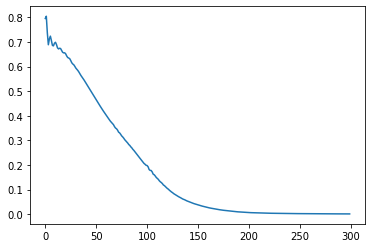

tensor(7.6811, grad_fn=<NllLossBackward>)
Test accuracy total: 38.89 %; correct: 7; wrong: 11;
Test accuracy doubt: 11.11 %; correct: 1; wrong: 8;
Test accuracy no-doubt: 66.67 %; correct: 6; wrong: 3;

Epoch: 0/300; Loss: 0.7167; Accuracy: 47.46 %
Epoch: 50/300; Loss: 0.5868; Accuracy: 69.21 %
Epoch: 100/300; Loss: 0.3690; Accuracy: 84.46 %
Epoch: 150/300; Loss: 0.1570; Accuracy: 96.33 %
Epoch: 200/300; Loss: 0.0399; Accuracy: 99.72 %
Epoch: 250/300; Loss: 0.0105; Accuracy: 100.00 %


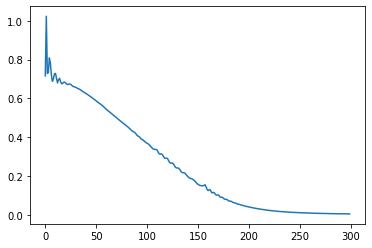

tensor(4.7726, grad_fn=<NllLossBackward>)
Test accuracy total: 35.71 %; correct: 5; wrong: 9;
Test accuracy doubt: 42.86 %; correct: 3; wrong: 4;
Test accuracy no-doubt: 28.57 %; correct: 2; wrong: 5;

Epoch: 0/300; Loss: 0.9852; Accuracy: 47.73 %
Epoch: 50/300; Loss: 0.5874; Accuracy: 63.64 %
Epoch: 100/300; Loss: 0.2561; Accuracy: 90.06 %
Epoch: 150/300; Loss: 0.0517; Accuracy: 99.43 %
Epoch: 200/300; Loss: 0.0082; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0031; Accuracy: 100.00 %


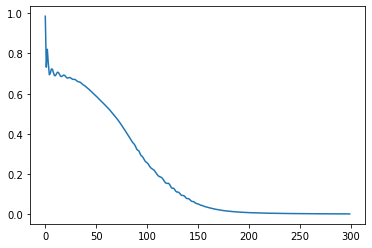

tensor(6.2593, grad_fn=<NllLossBackward>)
Test accuracy total: 43.75 %; correct: 7; wrong: 9;
Test accuracy doubt: 42.86 %; correct: 3; wrong: 4;
Test accuracy no-doubt: 44.44 %; correct: 4; wrong: 5;

Epoch: 0/300; Loss: 0.7046; Accuracy: 47.58 %
Epoch: 50/300; Loss: 0.4727; Accuracy: 76.64 %
Epoch: 100/300; Loss: 0.1273; Accuracy: 95.73 %
Epoch: 150/300; Loss: 0.0137; Accuracy: 100.00 %
Epoch: 200/300; Loss: 0.0033; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0016; Accuracy: 100.00 %


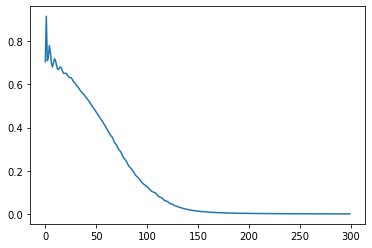

tensor(5.1693, grad_fn=<NllLossBackward>)
Test accuracy total: 52.94 %; correct: 9; wrong: 8;
Test accuracy doubt: 62.50 %; correct: 5; wrong: 3;
Test accuracy no-doubt: 44.44 %; correct: 4; wrong: 5;

Epoch: 0/300; Loss: 0.8054; Accuracy: 47.44 %
Epoch: 50/300; Loss: 0.5109; Accuracy: 71.88 %
Epoch: 100/300; Loss: 0.1879; Accuracy: 94.03 %
Epoch: 150/300; Loss: 0.0160; Accuracy: 100.00 %
Epoch: 200/300; Loss: 0.0035; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0017; Accuracy: 100.00 %


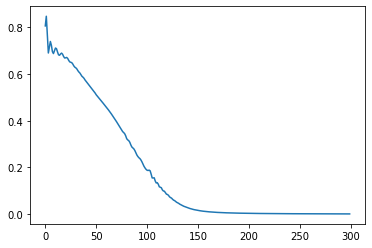

tensor(3.3385, grad_fn=<NllLossBackward>)
Test accuracy total: 50.00 %; correct: 8; wrong: 8;
Test accuracy doubt: 50.00 %; correct: 4; wrong: 4;
Test accuracy no-doubt: 50.00 %; correct: 4; wrong: 4;

Epoch: 0/300; Loss: 0.7711; Accuracy: 51.84 %
Epoch: 50/300; Loss: 0.4933; Accuracy: 73.65 %
Epoch: 100/300; Loss: 0.1497; Accuracy: 95.47 %
Epoch: 150/300; Loss: 0.0199; Accuracy: 100.00 %
Epoch: 200/300; Loss: 0.0044; Accuracy: 100.00 %
Epoch: 250/300; Loss: 0.0021; Accuracy: 100.00 %


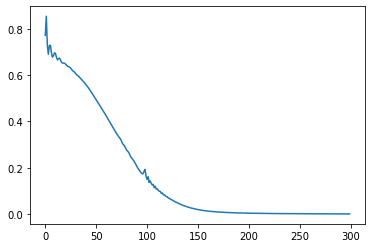

tensor(4.0054, grad_fn=<NllLossBackward>)
Test accuracy total: 66.67 %; correct: 10; wrong: 5;
Test accuracy doubt: 80.00 %; correct: 4; wrong: 1;
Test accuracy no-doubt: 60.00 %; correct: 6; wrong: 4;



In [10]:
all_losses = [[] for _ in range(num_participants)]
test_accuracies = []
test_accuracies_doubt = []
test_accuracies_nodoubt = []
for par in range(num_participants-1, -1, -1):
    # need to drop the 3 least significant columns to improve effciency
    features = data.iloc[:, :39]
    least_signifant_features = [11, 24, 35]
    features.drop(features.columns[least_signifant_features], axis=1, inplace=True)
    labels = data.iloc[:, 39:]
    msk = np.random.rand(len(data)) < 0.95
    features_train_df = features[msk]
    labels_train_df = labels[msk]
    features_test_df = features[~msk]
    labels_test_df = labels[~msk]
    X_train = torch.tensor(np.reshape(features_train_df.to_numpy(), (features_train_df.shape[0], 1, 36)), dtype=torch.double).float()
    Y_train = torch.tensor(labels_train_df.to_numpy(), dtype=torch.double)
    Y_train = Y_train.reshape((Y_train.shape[0],))
# features.shape, labels.shape
    X_test = torch.tensor(np.reshape(features_test_df.to_numpy(), (features_test_df.shape[0], 1, 36)), dtype=torch.double).float()
    Y_test = torch.tensor(labels_test_df.to_numpy(), dtype=torch.double)
    Y_test = Y_test.reshape((Y_test.shape[0]))

    net = nn.Sequential(Reshape(),
                    nn.Conv2d(1, 6, kernel_size=(1, 3), padding=(0, 1)),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=(1, 2), stride=2),
                    nn.Conv2d(6, 16, kernel_size=(1, 5), padding=(0, 2)),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=(1, 3), stride=3),
                    nn.Flatten(),
                    nn.Linear(16*1*6, 100),
                    nn.Sigmoid(),
                    nn.Linear(100, 2),
                    )

    # X = torch.rand(size=(1, 1, 1, 36), dtype=torch.float32)
    # for layer in net:
    #     X = layer(X)
    #     print(layer.__class__.__name__, 'output shape: \t', X.shape)

    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    # use crossentropy loss and adam for optimizer
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    # optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        Y_train_pred = net(X_train)
        Y_train_pred = Y_train_pred.float()
        loss = loss_func(Y_train_pred, Y_train.long())
        all_losses[par].append(loss.item())
        if epoch % 50 == 0:
            _, predicted = torch.max(Y_train_pred, 1)
            total = Y_train.data.size(0)
            correct = sum(predicted.data.numpy() == Y_train.data.numpy())
            print('Epoch: %d/%d; Loss: %.4f; Accuracy: %.2f %%' %(epoch, epochs, loss, 100*correct/total))
        net.zero_grad()
        loss.backward()
        optimizer.step()
    
    # extra visulization for training outcomes
    plt.figure()
    plt.plot(all_losses[par])
    plt.show()

    # test our network
    # X_test = torch.tensor(test_inputs.values, dtype=torch.float)
    # Y_test = torch.tensor(test_labels.values, dtype=torch.long)
    Y_test_pred = net(X_test)
    Y_test_pred = Y_test_pred.float()
    loss = loss_func(Y_test_pred, Y_test.long())
    print(loss)
    _, predicted = torch.max(Y_test_pred, 1)
    total_test = Y_test.shape[0]
    correct_test = sum(predicted.data.numpy() == Y_test.data.numpy())
    # calculate doubt and trust separately
    correct_doubt, correct_nodoubt, total_doubt, total_nodoubt = 0, 0, 0, 0
    for i in range(total_test):
        if Y_test.data.numpy()[i] == 1:
            total_nodoubt += 1
            if predicted.data.numpy()[i] == 1:
                correct_nodoubt += 1
        else:
            total_doubt += 1
            if predicted.data.numpy()[i] == 0:
                correct_doubt += 1
    test_accuracies.append(correct_test/total_test)
    if total_doubt != 0:
        test_accuracies_doubt.append(correct_doubt/total_doubt)
    if total_nodoubt != 0:
        test_accuracies_nodoubt.append(correct_nodoubt/total_nodoubt)
    print('Test accuracy total: %.2f %%; correct: %d; wrong: %d;' %(100*test_accuracies[-1], correct_test, total_test-correct_test))
    print('Test accuracy doubt: %.2f %%; correct: %d; wrong: %d;' %(100*test_accuracies_doubt[-1], correct_doubt, total_doubt-correct_doubt))
    print('Test accuracy no-doubt: %.2f %%; correct: %d; wrong: %d;\n' %(100*test_accuracies_nodoubt[-1], correct_nodoubt, total_nodoubt-correct_nodoubt))

In [11]:
    X = torch.rand(size=(1, 1, 1, 36), dtype=torch.float32)
    for layer in net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape: \t', X.shape)

Reshape output shape: 	 torch.Size([1, 1, 1, 36])
Conv2d output shape: 	 torch.Size([1, 6, 1, 36])
ReLU output shape: 	 torch.Size([1, 6, 1, 36])
MaxPool2d output shape: 	 torch.Size([1, 6, 1, 18])
Conv2d output shape: 	 torch.Size([1, 16, 1, 18])
ReLU output shape: 	 torch.Size([1, 16, 1, 18])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 6])
Flatten output shape: 	 torch.Size([1, 96])
Linear output shape: 	 torch.Size([1, 100])
Sigmoid output shape: 	 torch.Size([1, 100])
Linear output shape: 	 torch.Size([1, 2])


In [12]:
print(*[(name, param.shape) for name, param in net.named_parameters()])
# weight_input2hidden = np.absolute(net.state_dict()['1.weight'].data.numpy())
# weight_hidden2output = np.absolute(net.state_dict()['3.weight'].data.numpy())
# weight_input2hidden /= weight_input2hidden.sum(axis=1, keepdims=True)
# weight_hidden2output /= weight_hidden2output.sum(axis=1, keepdims=True)
# # calculate the Q weight matrix
# Q = np.dot(weight_hidden2output, weight_input2hidden).sum(axis=0)
# np.argsort(Q)

('1.weight', torch.Size([6, 1, 1, 3])) ('1.bias', torch.Size([6])) ('4.weight', torch.Size([16, 6, 1, 5])) ('4.bias', torch.Size([16])) ('8.weight', torch.Size([100, 96])) ('8.bias', torch.Size([100])) ('10.weight', torch.Size([2, 100])) ('10.bias', torch.Size([2]))


In [13]:
# show accuracies
print('Total accuracy: %.3f' %(sum(test_accuracies)/len(test_accuracies)))
print('Doubt accuracy: %.3f' %(sum(test_accuracies_doubt)/len(test_accuracies_doubt)))
print('Trust accuracy: %.3f' %(sum(test_accuracies_nodoubt)/len(test_accuracies_nodoubt)))

Total accuracy: 0.573
Doubt accuracy: 0.569
Trust accuracy: 0.576


In [14]:
# save selected pupil data
# data.to_csv('pupillary_dilation.csv', index=False)